##                       Applied Economic Analysis: Python Assignment

|Name|ANR|
|----|-------|
|Arslan Sabilov|310423|

### •	Research question
This research paper aims to answer the following question: does the possibility of short sales of assets necessarily lead to better optimal portfolio allocation, compared to the case when there is no such possibility? In other words, is higher flexibility always associated with better outcome, or there are some cases when restrictions on shorts sales lead to better financial performance of a portfolio of diversified assets? 
To answer this question, we will derive Sharpe-ratio-maximizing portfolio allocations with and without the possibility of short sales for three years: 2008 (downturn of the US economy), 2015 (relative stability of the US economy) and 2017 (a rising year of the US economy). Then we will compare the returns obtained from these portfolio allocations for each year.

### • Motivation for the research
The question at hand is interesting from two standpoints. 

Firstly, mathematically and logically speaking, lack of some constraint means higher set of possible actions having its goal to get highest possible return, taking into account the volatility associated with this return. Global maximum is always unstrictly larger than a local one. However, it may appear that limited set of choices may lead to better payoffs sometimes.

Secondly, many capital asset evaluation models (such as the Capital Asset Pricing Model, Arbitrage Pricing theory or Multi-Factor models) allow for the possibility of short sales. Moreover, these models often make their conclusions based on the maximization of the Sharpe ratio. Taking into consideration that there can be a constraint on short sales may make these models suggest more sensible strategies.

### •	Research methods
We will use Markowitz mean-variance theory to derive the efficient frontier of a portfolio of several assets. We will compare the performance of two Sharpe-ratio-maximizing portfolios (with and without the short-sale possibility) for the three years. For the derivation of portfolios without the short-sale possibility we will use Monte-Carlo method, randomly assigning weights and then choosing the optimum, while for the derivation of portfolios with the short-sale possibility we will use mathematical optimization method. Our portfolio consists of 4 stocks and we use 10000 random allocations for Monte-Carlo. Since there are 4 weights, each varying between 0 and 1 and giving in sum 1, this number is enough to achieve high precision.

### •	Main assumptions used to get the results
1) Investors are risk-averse rational return-maximizers. They consider dividend payments to be proportional to capital gains, so that dividends do not matter for their choice. Or, alternatively, we can assume that prices of securities reflect the dividend policies of the corresponding companies. Investors share the same information set.

2) ”Perfect” capital markets (i.e. perfect free information, no transaction costs, taxes, etc.) with no limits to borrowing and lending at the risk-free rate. Risk and return are the only characteristics of securities. No large players which can influence prices: perfectly competitive capital markets.

3) The selected years of 2008, 2015 and 2017 are representative of what one may call “bad times”, “stable times” and “good times”, respectively. Although there was a downturn in August of 2015, on average this year was stable in the sense that at the year end the indexes were similar in their levels to those at the beginning of the year. 

4) Risk-free rate is assumed for simplicity to be 0.

5) By allowing for short sales, we allow for holding long positions as well. We do not consider short-sale possibility separately from the possibility of holding long positions.

### •	Limitations of the analysis
1) The analysis may be sensitive to the quantity of assets chosen (we consider 4 assets – pretty small number, but enough to get a diversified portfolio), the assets chosen themselves (we consider Apple, Microsoft, Texas Instruments and Cisco – four large companies from the hi-tech industry) and the years chosen for the analysis (we consider the years of 2008, 2015 and 2017)

2) In the first stage we find optimal portfolios from the point of view of maximization of the Sharpe ratio. The point where the Sharpe ratio is maximized is also called the “Tangency portfolio”, which is a portfolio on the efficient frontier at the point where the line drawn from the point (0, risk-free rate) is tangent to the efficient frontier. Sharpe ratio measures the return adjusted for volatility, and the higher this ratio is, the higher is the adjusted return. The use of the Sharpe ratio as a mean to find an optimal portfolio is not unquestionable, because Sharpe ratio does not differentiate between the volatility “upwards” and the volatility “downwards”. This is consistent with the Markowitz portfolio theory, and as stated above the ratio is quite popular in many evaluation techniques, but the usage of this ratio is a limitation, as volatility is not the same as risk. 

In the second stage we compare the returns of the portfolios through time for the year chosen. By comparing just the graphs for the returns of the portfolios we skip the dimension of volatility out, as we do not adjust for volatility as, for example, the Sharpe ratio does. Thus, Sharpe ratio with the possibility of short sales should be always larger than Sharpe ratio without such possibility, following the logic between global and local maxima. However, by applying the analysis in the way we do allows for the possibility of the graph of returns of the portfolio without the possibility of short sales to lie above the one with the possibility of short sales.

### • The code

##### Importing data 

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from pandas_datareader import data
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
%matplotlib inline
import quandl
quandl.ApiConfig.api_key = "FZCjpYTSpS7TQrKFZAt-"

In [2]:
# 4 stocks selected: Apple, Microsoft, Texas Instruments and Cisco
tickers = ['AAPL','MSFT','TXN','CSCO']

In [3]:
# Importing data on stock prices from Yahoo Finance
data = web.DataReader(tickers,data_source='yahoo',start='01/01/2017',end='12/31/2017')['Adj Close']
data.sort_index(inplace=True)
data.head(5)

Symbols,AAPL,CSCO,MSFT,TXN
Date,,,,
2017-01-03,112.620964,28.396254,60.171543,69.950455
2017-01-04,112.494911,28.227455,59.902313,69.864891
2017-01-05,113.066986,28.293098,59.902313,69.323013
2017-01-06,114.327484,28.349365,60.421535,70.492340
2017-01-09,115.374664,28.302477,60.229233,70.672966


In [4]:
# Getting the daily returns
returns = data.pct_change()

# let's switch to logreturns, as they detrend (normalize) time series
log_ret = np.log(data/data.shift(1))

##### Optimal portfolio without short sales possibility 

In [5]:
# Monte Carlo method applied to find an optimal portfolio without the possiblity of short sales
np.random.seed(110)
num_ports = 10000
all_weights = np.zeros(((num_ports),4))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):    
    # Weights
    weights = np.array(np.random.random(4))
    # Rebalancing the weights so that they add up to 1
    weights=weights/np.sum(weights)
    all_weights[ind,:] = weights
    # Expected return of 4 weighted assets in terms of logarithmic returns over the period of 1 year. 
    # Need to convert daily returns and standard deviation to an annualized basis by multiplying by the number of working days in a year.
    ret_arr[ind] = np.sum((log_ret.mean() * weights) * 252 )
    # Expected volatility calculation
    vol_arr[ind] = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))
    # SR calcualtion (zero risk-free rate is assumed)
    sharpe_arr[ind]=ret_arr[ind]/vol_arr[ind]

In [6]:
# Index of the SR maximizing allocation
indexx = sharpe_arr.argmax()

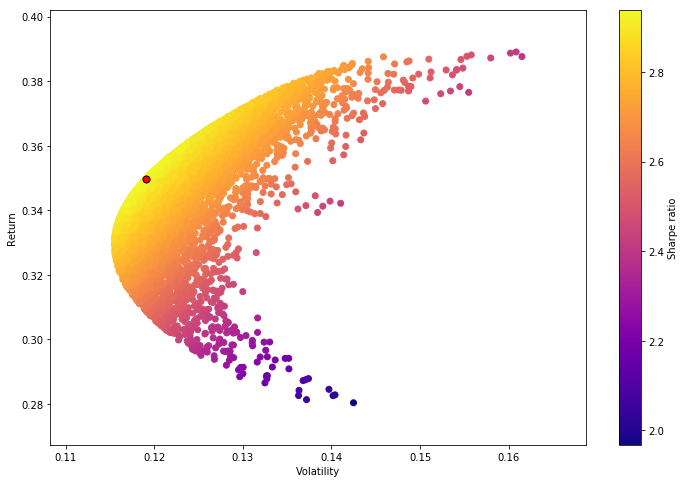

In [7]:
# Graphical representation
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
#Red dot for max SR
max_sr_ret = ret_arr[indexx]
max_sr_vol = vol_arr[indexx]

plt.scatter(max_sr_vol, max_sr_ret, c='red', s=50, edgecolors='black')

The chart confirms that the mean-varience set is of the expected form.

In [8]:
# SR max value
sharpe_arr.max()

2.9385198725921047

In [9]:
# Return at this index
ret_arr[indexx]

0.34981229359295335

In [10]:
# Volatility at this index
vol_arr[indexx]

0.11904370525300535

In [11]:
# Saving the resulting weights: no-short-sale optimal allocation
weights_ns = all_weights[indexx]
weights_ns

array([0.27542703, 0.19238446, 0.27150568, 0.26068282])

##### Optimal portfolio without short sales possibility

In [12]:
# Now, for the short-sale possibility we do not have constraints on weights - the only condition is that their sum is 1

In [13]:
# Defining a function of an array of variables depending on weights
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [14]:
# Importing the minimization function
from scipy.optimize import minimize

In [15]:
# Minimizing negative of SR is equivalent to maximizing SR
def neg_sharpe(weights):
    return get_ret_vol_sr(weights)[2] * -1

In [16]:
# Constraints. Function sum_check will check the sum of the weights, which has to be equal to 1. It will return 0 if the sum is 1.
def sum_check(weights):
    # return 0 if sum of the weights is 1
    return np.sum(weights) - 1
cons = ({'type':'eq','fun':sum_check})

In [17]:
# Stating position for minimization
initial_guess=[0.25,0.25,0.25,0.25]

In [18]:
# Minimization funcion by Sequential Least Squares Programming
opt_results = minimize(neg_sharpe,initial_guess,method='SLSQP',constraints=cons)
opt_results

     fun: -2.9385800722414195
     jac: array([-0.00072771,  0.00260013,  0.00035122, -0.00151002])
 message: 'Optimization terminated successfully.'
    nfev: 27
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([0.2713272 , 0.1925571 , 0.27016524, 0.26595046])

In [19]:
# Saving the resulting weights: short-sale optimal allocation
weights_ss = opt_results.x
weights_ss

array([0.2713272 , 0.1925571 , 0.27016524, 0.26595046])

In [20]:
# Return, volatility and SR at these weights
get_ret_vol_sr(opt_results.x)

array([0.34977659, 0.11902912, 2.93858007])

##### Comparison of the performance

In [21]:
# Now let us compare the performance of the no-short-sales and short-sales optimal portfolios, parallely comparing them to the general market performance. 

In [22]:
# Let our starting capital be $100k. We have to assess how many shares of each type we would be able to buy at the beginning of the year. Then we would trace our choice and observe its performance.
test = data[data.index >= '01/01/2017']

In [23]:
num_shares = weights_ns * 100000 / test.iloc[0,]
np.dot(num_shares, test.iloc[0,])
no_short = test.dot(num_shares)

In [24]:
num_sharess = weights_ss * 100000 / test.iloc[0,]
np.dot(num_sharess, test.iloc[0,])
short_sell = test.dot(num_sharess)

In [25]:
# Get Market Index. We graph portfolios' performance as well as performance of the market as a benchmark.
Market = quandl.get("NASDAQOMX/COMP", start_date="01/01/2017")["Index Value"]

# Invest $100,000 on Jan. 1st 2017
market_shares = 100000 / Market.iloc[0,]
Market_Overall = Market * market_shares

In [26]:
portfolio = pd.DataFrame({'Short Sell' : short_sell, 'Cannot Short':no_short})
portfolio = portfolio.join(Market_Overall)
portfolio.rename(columns={'Index Value':'Market Value'},inplace=True)

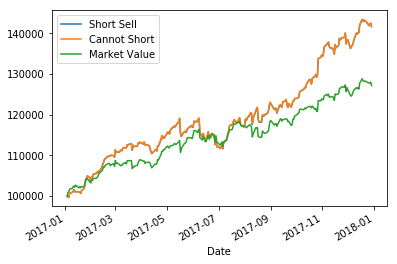

In [27]:
# Plot Results, Compare returns of the SR-maximizing portfolio with and without short sale possibility
%matplotlib inline
portfolio.plot(kind='line')

As we see, the lines for the short-sale and no-short-sale portfolios are indiscernible from each other. This is because the optimal weights we got for these two portfolios lie close to each other, and in fact the optimal portfolio with the possibility of short sales does not exploit this possibility. In the rising year of 2017 there was no need to exploit this possibility for the four stocks of our choice. Both portfolios perform better than the overall market, thus following the strategy of maximizing the Sharpe ratio would be a good choice.

Applying the same procedure as we did for 2017, but now importing data for 2008 and 2015, we get the following:

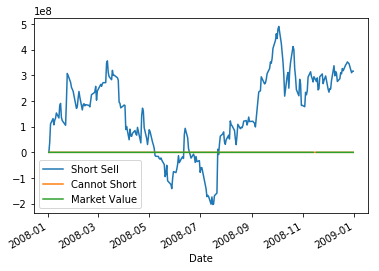

In [28]:
from PIL import Image
im = Image.open("C:/Users/Arslan/Downloads/eight.png")
im

On the vertical axis we can see '1e8', which means that the scale is 1* 10^8. The graph lines for the market portfolio and for the optimal portfolio without the possibility of short sales are indiscernible (this can be seen in the region between 2008-11 and 2009-01, where the orange line intersects the green one). Obviously, at the times of recession it would be unprofitable not to sale some stocks short and buy others long.

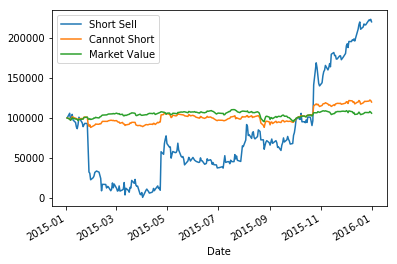

In [29]:
im2 = Image.open("C:/Users/Arslan/Downloads/fifteen.png")
im2

In the year of relative stability the portfolio with the short sale possibility performes worse than the market portfolio and the portfolio without such possibility for major part of the year, and capital accumulation (compared to the initial level) starts only in November. Having observed the price lines for individual stocks included in our portfolio, we cannot suggest any explanation why there is such a steep rise in the value of the Short sell portfolio in November.

### • Conclusion and Future Research

If an agent correctly calculates (predicts) the weights of the Sharpe-ratio-maximizing portfolio for the upcoming year, there is no guarantee that the optimal portfolio which allows for short sales will always give higher returns than that without such possibility. This research attempted to show this oppurtunity, as well as to identify periods when short sale possibility is more a limitation than a beneficial dimension of choice. Our expectation was that in 2017 it would be unprofitable to use short sale possibility as the year was rising, in 2008 it would be very profitable to use this possibility as the year was recessive, and in 2015 it would make approximately no difference to use this possibility or not to use, as the year was relatively stable. Despite the fact that our results are inconclusive, we showed that in principle no-short-sale portfolio may significantly and consistently overperform the short sale one at least for some part of the year. Future analysis may be targeted towards strengthening the evidence and explining in a sensible manner why this can happen. 